<a href="https://colab.research.google.com/github/saad9982/dd0/blob/main/GraduationProject_new01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#!gdown https://drive.google.com/file/d/1jupTnZAzki92RdEVUtE8-mmOPtQwHW2L/view?usp=sharing
#!gdown https://drive.google.com/uc?id=1vURhW9sbAMatLQ4Ilmw79ldxy0CJTbp6
#!gdown https://drive.google.com/uc?id=1vmW5JAYo1eB_rYAb0AtvHuum-2H5b40-
#!gdown https://drive.google.com/uc?id=13JE6mcQB2Da0WXegS1w2Up2Ni33e4hFG

In [4]:
train_data = pd.read_csv("./csvTrainImages 60k x 784.csv")
test_data = pd.read_csv("./csvTestImages 10k x 784.csv")
train_label = pd.read_csv("./csvTrainLabel 60k x 1.csv")
test_label = pd.read_csv("./csvTestLabel 10k x 1.csv")

In [5]:
train_data.shape, test_data.shape, train_label.shape, test_label.shape

((59999, 784), (9999, 784), (59999, 1), (9999, 1))

In [6]:
train_label.iloc[:,0]

0        1
1        2
2        3
3        4
4        5
        ..
59994    5
59995    6
59996    7
59997    8
59998    9
Name: 0, Length: 59999, dtype: int64

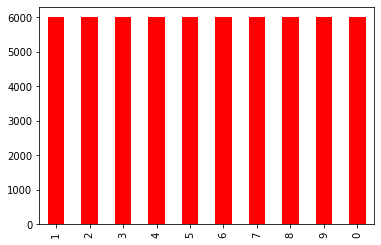

In [7]:
train_label.iloc[:, 0].value_counts().plot(cmap = "autumn", kind = "bar")

In [8]:
y_train = np.zeros(shape=(train_label.shape[0], train_label.values.max() + 1))
for index, row in train_label.iterrows():
    y_train[index][row["0"]] = 1

In [9]:
y_test = np.zeros(shape=(test_label.shape[0], test_label.values.max() + 1))
for index, row in test_label.iterrows():
    y_test[index][row["0"]] = 1

In [10]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [11]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [12]:
x_train = train_data.to_numpy()
x_test = test_data.to_numpy()

In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

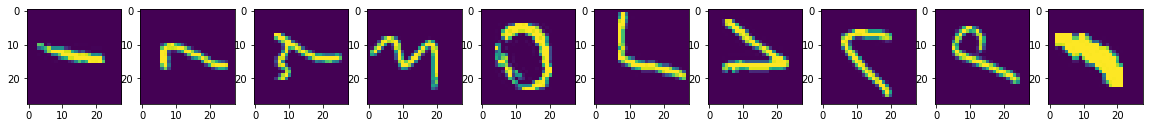

In [14]:
fig, ax = plt.subplots(1,10, figsize = (20,20))
for i in range(10):
    ax[i].imshow(x_train[i])

In [15]:
x_train = np.array([element.transpose() for element in x_train])
x_test = np.array([element.transpose() for element in x_test])

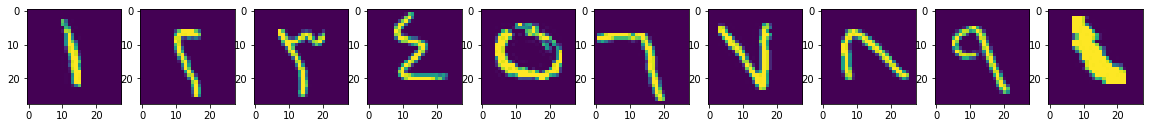

In [16]:
fig, ax = plt.subplots(1,10, figsize = (20,20))
for i in range(10):
    ax[i].imshow(x_train[i])

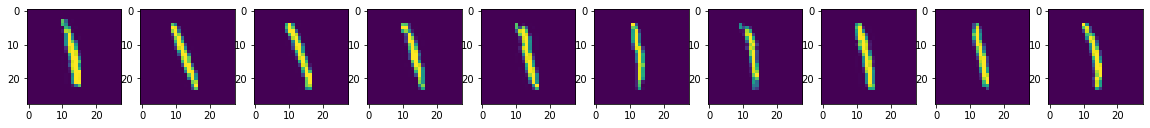

In [17]:
fig, ax = plt.subplots(1,10, figsize = (20,20))
for i in range(10):
    ax[i].imshow(x_train[i*10])

In [18]:
train_shuffle_idx = np.arange(x_train.shape[0])
test_shuffle_idx = np.arange(x_test.shape[0])
np.random.shuffle(train_shuffle_idx)
np.random.shuffle(test_shuffle_idx)

In [19]:
x_train = x_train[train_shuffle_idx]
y_train = y_train[train_shuffle_idx]
x_test = x_test[test_shuffle_idx]
y_test = y_test[test_shuffle_idx]

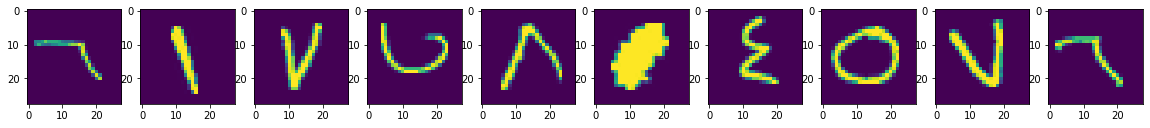

In [22]:
fig, ax = plt.subplots(1,10, figsize = (20,20))
for i in range(10):
    ax[i].imshow(x_train[i*10])

In [23]:
for i in range(10):
    print(y_train[i*10].argmax())

6
1
7
7
8
0
4
5
7
6


In [24]:
x_train.min()

0

In [25]:
x_train.max()

255

In [26]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [27]:
print(f"x_train's min value: {x_train.min()}\nx_train's max value: {x_train.max()}")

x_train's min value: 0.0
x_train's max value: 1.0


In [28]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [29]:
x_train.shape

(59999, 28, 28, 1)

In [30]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5,activation="relu", padding="same", input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="valid"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="valid"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1), padding="valid"))
model.add(tf.keras.layers.BatchNormalization())
          
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                        

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=0.0, verbose=1)
earlyStop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, verbose=1)

In [33]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

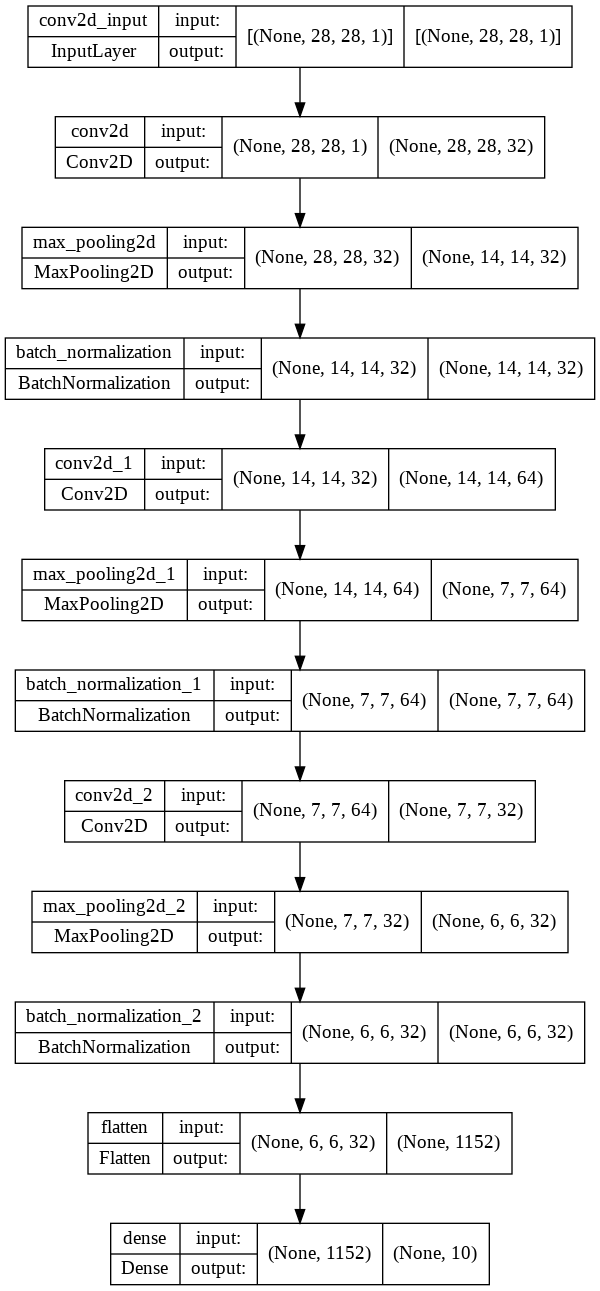

In [34]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [35]:
hist = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, validation_split=0.2, callbacks=[reduce_lr, earlyStop])

Epoch 1/40
1500/1500 [==============================] - 92s 61ms/step - loss: 0.0622 - accuracy: 0.9822 - val_loss: 0.0352 - val_accuracy: 0.9893 - lr: 0.0010
Epoch 2/40
1500/1500 [==============================] - 90s 60ms/step - loss: 0.0269 - accuracy: 0.9920 - val_loss: 0.0197 - val_accuracy: 0.9946 - lr: 0.0010
Epoch 3/40
1500/1500 [==============================] - 89s 59ms/step - loss: 0.0221 - accuracy: 0.9934 - val_loss: 0.0281 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 4/40
1500/1500 [==============================] - 90s 60ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0202 - val_accuracy: 0.9935 - lr: 0.0010
Epoch 5/40
1500/1500 [==============================] - 89s 59ms/step - loss: 0.0145 - accuracy: 0.9957 - val_loss: 0.0180 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 6/40
1500/1500 [==============================] - 89s 60ms/step - loss: 0.0133 - accuracy: 0.9960 - val_loss: 0.0188 - val_accuracy: 0.9941 - lr: 0.0010
Epoch 7/40
1500/1500 [========================

In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.0447 - accuracy: 0.9917


[0.044715605676174164, 0.9916991591453552]

In [37]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

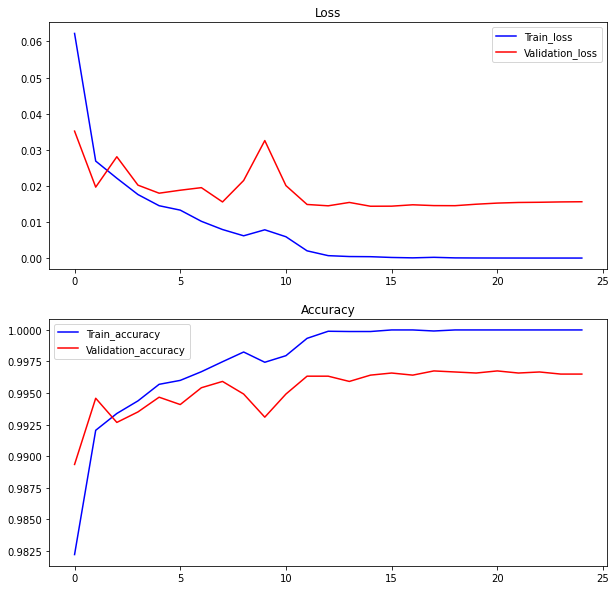

In [38]:
fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].set_title("Loss")
ax[0].plot(hist.history["loss"], c="b", label="Train_loss")
ax[0].plot(hist.history["val_loss"], c="r", label="Validation_loss")
ax[0].legend(loc="best")

ax[1].set_title("Accuracy")
ax[1].plot(hist.history["accuracy"], c="b", label="Train_accuracy")
ax[1].plot(hist.history["val_accuracy"], c="r", label="Validation_accuracy")
ax[1].legend(loc="best");

In [39]:
sample = x_test[:10]

In [40]:
pred = model.predict(sample)

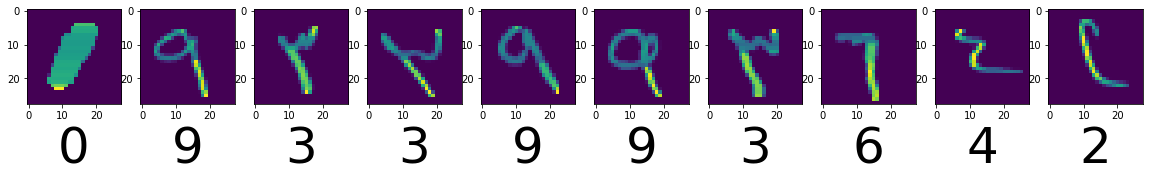

In [41]:
fig, ax = plt.subplots(1, 10, figsize=(20,20))
for idx, x in enumerate(sample):
    ax[idx].imshow((tf.squeeze(x)))
    ax[idx].set_xlabel(pred[idx].argmax(), fontsize=50)